In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

In [6]:
data = pd.read_csv(url)

In [7]:
dimensioni = dataset.shape
print ("dimensioni del dataset" , dimensioni)

NameError: name 'dataset' is not defined

In [8]:
print("Dimensioni del dataset:", data.shape)

Dimensioni del dataset: (388928, 67)


In [10]:
print("Metadati del dataset:")
print(data.info())

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388928 entries, 0 to 388927
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388928 non-null  object 
 1   continent                                   370333 non-null  object 
 2   location                                    388928 non-null  object 
 3   date                                        388928 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         3770

In [16]:
# Calcolo della somma dei casi totali per ogni continente escludendo le locazioni senza indicazione di continente
casi_totali_per_continente = data[data['continent'].notna()].groupby('continent')['total_cases'].sum()
print("Casi totali per continente:")
print(casi_totali_per_continente)

Casi totali per continente:
continent
Africa           1.286876e+10
Asia             2.120759e+11
Europe           2.031561e+11
North America    1.105376e+11
Oceania          9.609695e+09
South America    6.434761e+10
Name: total_cases, dtype: float64


In [27]:
# Confrontare i descrittori statistici tra continenti
continent1 = "Europe"
continent2 = "Asia"

In [29]:
# Selezionare i dati relativi ai continenti specificati
data_continent1 = data[data['continent'] == continent1]
data_continent2 = data[data['continent'] == continent2]

In [30]:
# Calcolare i descrittori statistici
massimo_continent1 = data_continent1['total_cases'].max()
media_continent1 = data_continent1['total_cases'].mean()
percentuale_continent1 = (data_continent1['total_cases'].sum() / data['total_cases'].sum()) * 100

In [31]:
massimo_continent2 = data_continent2['total_cases'].max()
media_continent2 = data_continent2['total_cases'].mean()
percentuale_continent2 = (data_continent2['total_cases'].sum() / data['total_cases'].sum()) * 100

In [32]:
print("Continent 1:")
print("Massimo:", massimo_continent1)
print("Media:", media_continent1)
print("Percentuale rispetto al totale:", percentuale_continent1)

Continent 1:
Massimo: 38997490.0
Media: 2679982.5787612954
Percentuale rispetto al totale: 7.82552932158371


In [33]:
print("\nContinent 2:")
print("Massimo:", massimo_continent2)
print("Media:", media_continent2)
print("Percentuale rispetto al totale:", percentuale_continent2)


Continent 2:
Massimo: 99345680.0
Media: 3199745.475097693
Percentuale rispetto al totale: 8.169120098938036


In [37]:
data['date'] = pd.to_datetime(data['date'])

In [38]:
# Filtrare i dati per l'Italia nel 2022
data_italia_2022 = data[(data['location'] == 'Italy') & (data['date'].dt.year == 2022)]

In [40]:
data_italia_2022.loc[:, 'cumulative_cases'] = data_italia_2022['new_cases'].cumsum()

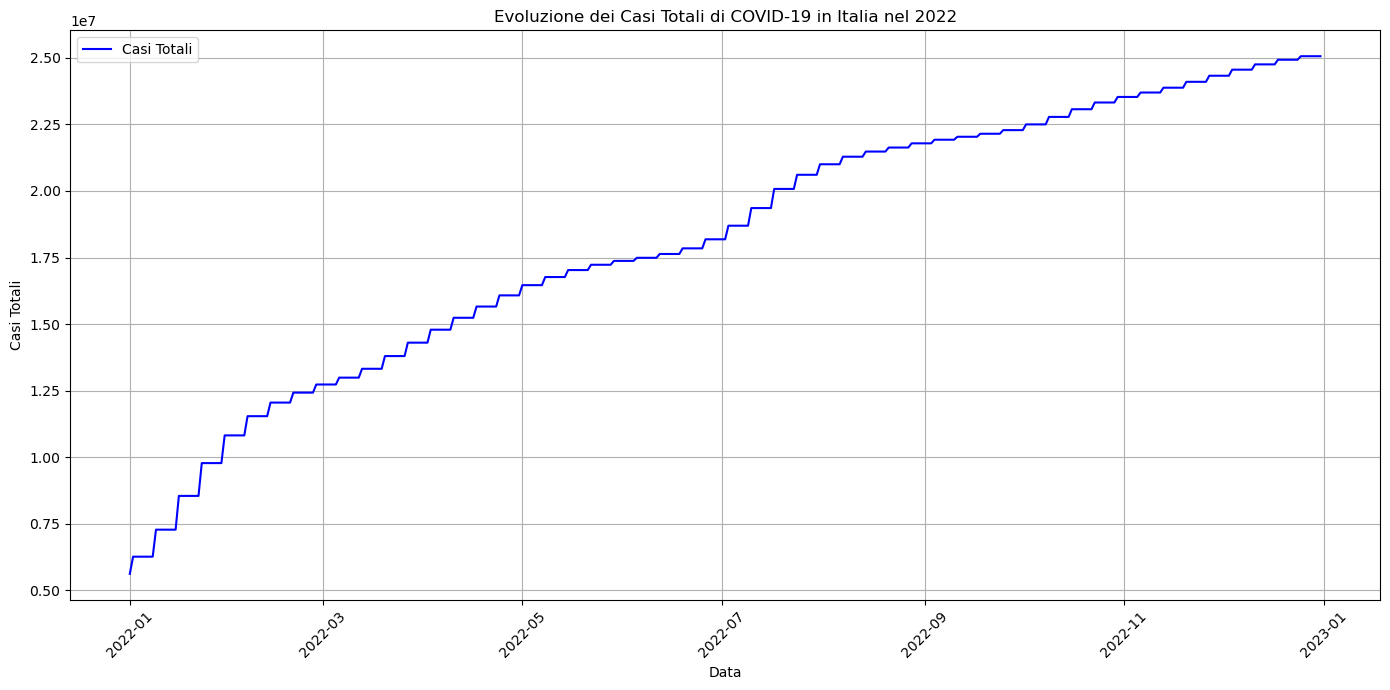

In [42]:
# Grafico evoluzione casi totali
plt.figure(figsize=(14, 7))
plt.plot(data_italia_2022['date'], data_italia_2022['total_cases'], color='blue', label='Casi Totali')
plt.title('Evoluzione dei Casi Totali di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

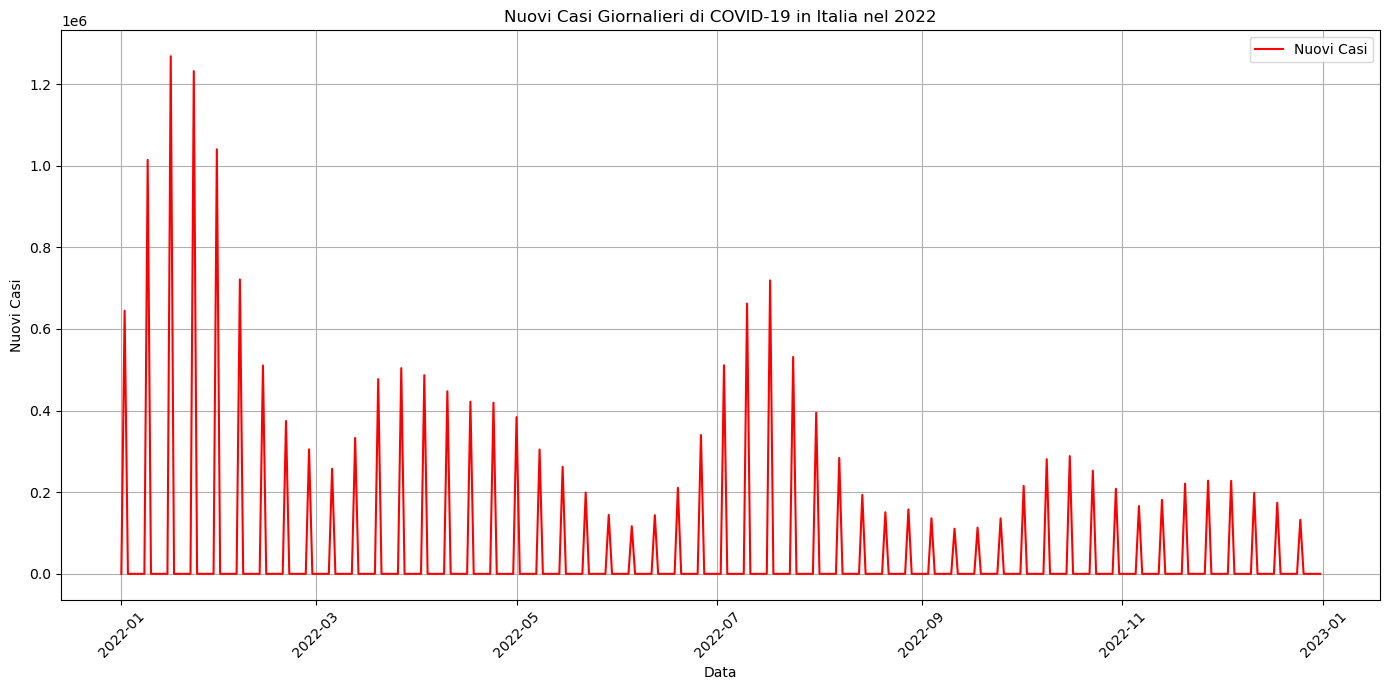

In [43]:
 # Grafico nuovi casi
plt.figure(figsize=(14, 7))
plt.plot(data_italia_2022['date'], data_italia_2022['new_cases'], color='red', label='Nuovi Casi')
plt.title('Nuovi Casi Giornalieri di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

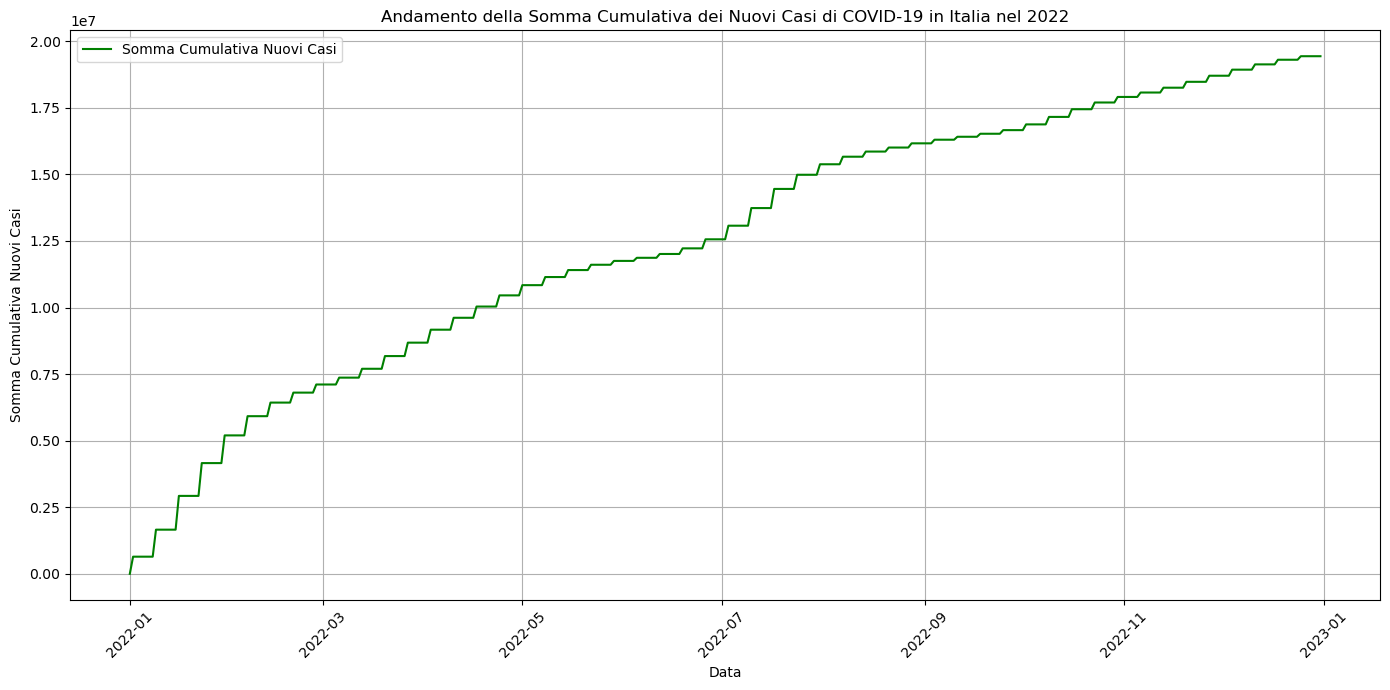

In [44]:
# Andamento della Somma Cumulativa dei Nuovi Casi
plt.figure(figsize=(14, 7))
plt.plot(data_italia_2022['date'], data_italia_2022['cumulative_cases'], color='green', label='Somma Cumulativa Nuovi Casi')
plt.title('Andamento della Somma Cumulativa dei Nuovi Casi di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Confrontando i tre grafici, si nota che l'andamento dei casi totali 
# e la somma cumulativa dei nuovi casi mostrino una curva simile.
# Entrambi i grafici rappresentano in modi diversi l'accumularsi dei casi nel tempo.
# La curva dei casi totali tende ad aumentare in maniera più uniforme.
# La somma cumulativa dei nuovi casi, d'altra parte, 
# offre una visione più diretta dell'incremento dei casi nel corso dell'anno.

In [50]:
data_filtered = data[
    (data['location'].isin(['Italy', 'Germany', 'France'])) &
    (data['date'] >= '2022-05-01') &
    (data['date'] <= '2023-04-30')]

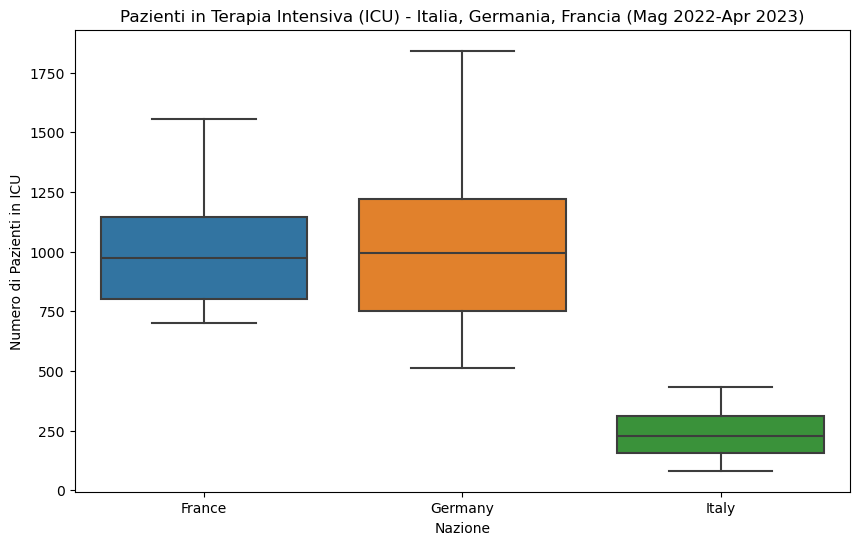

In [53]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=data_filtered)
plt.title('Pazienti in Terapia Intensiva (ICU) - Italia, Germania, Francia (Mag 2022-Apr 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in ICU')
plt.show()

In [ ]:
# Per la Francia e la Germania, la mediana si trova a circa 1000, il che suggerisce che il 50% centrale dei dati ha un numero di pazienti in terapia intensiva intorno a questo valore. Per l'Italia, la mediana è molto inferiore, poco sotto i 250, indicando che il numero di pazienti in terapia intensiva è significativamente più basso rispetto agli altri due paesi.
# L' Italia ha la mediana molto inferiore, poco sotto i 250, indicando che il numero di pazienti in terapia intensiva è significativamente più basso rispetto agli altri due paesi.
# La Francia e la Germania hanno un IQR ampio, indicando una variazione considerevole nei numeri di pazienti in terapia intensiva; mentre l'Italia ha un IQR più stretto indicando una variazione meno estesa nei numeri di pazienti in terapia intensiva rispetto agli altri due paesi. 
# L'Italia ha una distribuzione più concentrata rispetto alla mediana, diversamente dagli altri due paesi
# In conclusione, questi dati suggeriscono che la Francia e la Germania potrebbero aver affrontato una variazione più ampia nel numero di pazienti in terapia intensiva rispetto all'Italia nel periodo considerato.